<center>
    <h1> ILI285 - Computación Científica I / INF285 - Computación Científica  </h1>
    <h2> Least Squares </h2>
    <h2> [[S]cientific [C]omputing [T]eam](#acknowledgements)</h2>
    <h2> Version: 1.24</h2>
</center>

## Table of Contents
* [Introduction](#intro)
* [QR Factorization](#qr)
* [Examples](#ex)
* [Inconsistents Systems](#in)
* [A Survey of Models](#sm)
* [Acknowledgements](#acknowledgements)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spla
%matplotlib inline
from sklearn import datasets
import ipywidgets as widgets
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
# from scipy.interpolate import CubicSpline # Starting scipy 0.19.0
M=8

<div id='intro' />
## Introduction

We have learned about square linear system of equations. 
However, How can we solve a non-square system? (More equations that unknowns!) Well, we need to find a least squares approximation. 

<div id='qr' />
# QR Factorization

## Gram-Schmidt Orthogonalization

This algorithm orthogonalize a set of input vectors, returning an **orthogonal set** that spans the same column space.
We will only consider now that the input set of vectors are **linearly independent**.

Let $A=[A_1\, ...., A_n]$ a matrix with linearly independent column vectors $\in\mathbb{R}^m$ and $n \le m$.

We know the following for the orthogonal set:

\begin{align*}
    q_i^*\,q_i & = \|q_i\|_2^2= 1\\
    q_i^*\,q_j & = 0, \, \text{ for } i\neq j
\end{align*}

Then the Gram-Schmidt orthogonalization finds the $q_i$ and $r_{ij}$ from the following set of equations and considering the previous constraints:
\begin{align*}
    A_1 &= r_{11}\,q_1\\
    r_{11} &= \|A_1\|_2\\
    q_1 &= \dfrac{y_1}{r_{11}}\\
    A_2 &= r_{12}\,q_1+r_{22}\,q_2\\
    r_{12} &= q_1^*\,A_2\\
    r_{22} &= \|A_2-r_{12}\,q_1\|\\
    q_2 &= \dfrac{A_2-r_{12}\,q_1}{r_{22}}\\
    \vdots &=  \vdots\\
    A_j &= \sum_{i=1}^j r_{ij}\,q_i\\
    r_{ij} &= q_i^*\,A_j, \, \text{ for } i<j\\
    r_{jj} &= \|A_j-\sum_{i=1}^{j-1} r_{ij}\,q_i\|\\
    q_j &= \dfrac{A_j-\sum_{i=1}^{j-1} r_{ij}\,q_i}{r_jj}\\
    \vdots &=  \vdots\\
    A_n &= \sum_{i=1}^n r_{in}\,q_i\\
    r_{in} &= q_i^*\,A_n, \, \text{ for } i<n\\
    r_{nn} &= \|A_n-\sum_{i=1}^{n-1} r_{in}\,q_i\|\\
    q_n &= \dfrac{A_n-\sum_{i=1}^{n-1} r_{in}\,q_i}{r_{nn}}
\end{align*}

Thus, we obtain the QR decomposition as follows:


\begin{equation}
                 A_{m\times n} = Q_{m\times n}R_{n\times n}\\
\end{equation}

Where $Q$ is a matrix of vectors $q_{n}$, and $R$ is an upper-triangular matrix, with the coefficients $r_{ij}$:

This is known as the **Reduced QR Factorization**. 

_**[IMPORTANT]** What is then a **full** QR decomposition?_


In [3]:
# Inputs:
# A: A set of linearly independent columns
# type_factorization: reduced or full
# type_gram_schmidt: classic or modified
def QR(A, type_factorization = 'reduced', type_gram_schmidt='classic'):
    A.astype('float')
    if type_factorization == 'reduced':
        Q = np.zeros(A.shape)
        R = np.zeros((A.shape[1],A.shape[1]))
    elif type_factorization == 'full':
        Q = np.zeros((A.shape[0],A.shape[0]))
        R = np.zeros(A.shape)
    for j in np.arange(A.shape[1]):
        y = A[:,j]
        for i in np.arange(j):
            if type_gram_schmidt == 'classic':
                R[i,j] = np.dot(Q[:,i],A[:,j])
            elif type_gram_schmidt == 'modified':
                R[i,j] = np.dot(Q[:,i],y)
            y=y-R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(y)
        Q[:,j] = y/np.linalg.norm(R[j,j])
    # The following lines must be completed by you!
    #if type_factorization == 'full':    
        # (1) We need to add 0's to the R matrix so it is of the same shape as the matrix A, 
        # fortunately this was already done!
        # (2) We need to add orthogonal vectors to Q so it is square,
        # how do we do this?   
    return Q,R          

In [6]:
A = np.array([[1,-4],[2,3],[2,2]])
Qa, Ra = QR(A, type_factorization ='reduced', type_gram_schmidt='classic')
print(np.dot(Qa,Ra))
print(Qa)
print(Ra)

[[ 1. -4.]
 [ 2.  3.]
 [ 2.  2.]]
[[ 0.33333333 -0.93333333]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.13333333]]
[[ 3.  2.]
 [ 0.  5.]]


This method let us resolve a system of equations. However, exists a **Full QR Factorization**, creating the next system:

\begin{equation}
                 A_{m\times n} = Q_{m\times m}R_{m\times n}\\
\end{equation}

Q is a square orthogonal matrix, adding $m-n$ columns and R grows adding $m-n$ zero rows.

#### Theorem
A square matrix $Q$ is orthogonal if $Q^*\, = Q^{-1}$


<div id='ex' />
## Examples

### Normal vs Modified Gram-Schmidt


In [7]:
d = 1e-10
A = np.array([[1,1,1],[d,0,0],[0,d,0],[0,0,d]])

Q1,R1 = QR(A, type_gram_schmidt = 'classic')
Q2,R2 = QR(A, type_gram_schmidt = 'modified')

# Are truly orthogonal the Q's?
print(Q1)
print(Q2)
# Do we recover A?
print(np.dot(Q1,R1))
print(np.dot(Q2,R2))

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e-10  -7.07106781e-01  -7.07106781e-01]
 [  0.00000000e+00   7.07106781e-01   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   7.07106781e-01]]
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e-10  -7.07106781e-01  -4.08248290e-01]
 [  0.00000000e+00   7.07106781e-01  -4.08248290e-01]
 [  0.00000000e+00   0.00000000e+00   8.16496581e-01]]
[[  1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.00000000e-10   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e-10   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e-10]]
[[  1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.00000000e-10   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e-10   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e-10]]


<div id='in' />
## Inconsistent Systems

There is cases where the number of equations is greater than variables. Many times, those systems don't have an exact solution (inconsistent system). Then, in this case we needs an approximation closest to the data. Based in orthogonality, the shortest distance from a point to plane. The orthogonal distance represents the error which would be minimum.

\begin{equation} 
                 b - A\,x = \vec{r}\\
                 b - A\,x \perp \{A\,x | x \in \mathcal{R}\}
\end{equation}

The idea is that $\vec{r}$ would be closest to zero. We need to apply orthogonality to find the vector that satisfied this condition.

\begin{equation} 
                 (Ax)^*\,(b-A─\overline{x})=0 \hspace{1cm} \text{for all } x \in \mathcal{R^n}\\
                 x^*\, A^*\,(b-A─\overline{x})=0 \hspace{1cm} \text{for all } x \in \mathcal{R^n}\\
                 A^*\,(b-A─\overline{x})=0 \\
                 A^*\,A\overline{x}= A^*\,b \\
\end{equation}

This last equation gives us a new square $n\times n$ matrix, which let us resolve the equation system.
This linear system of equations is known as the **Normal Equations**.

In [9]:
def least_squares(A,b):
    Q,R = QR(A,type_gram_schmidt='modified')
    return spla.solve_triangular(R,np.dot(Q.T,b))

def solve_model(M):
    A=M['A']
    b=M['b']
    M['x_bar']=least_squares(A,b)
    return M

def create_model(data, type_model='linear'):
    if type_model == 'linear': # f(x)=a0+a1*x
        A = np.ones((data.shape[0],2))
        A[:,1] = data[:,0]
        b = data[:,1]
    if type_model == 'parabollic': # f(x)=a0+a1*x+a_2*x^2
        A = np.ones((data.shape[0],3))
        A[:,1] = data[:,0]
        A[:,2] = data[:,0]**2
        b = data[:,1]
    if type_model == 'exponential': #f(x)=a0 \exp(a1*x) = \exp(\log(a0)+a1*x) -> log(f(x))=log(a0)+a1*x = A0+a1+x (it is linear now!)
        A = np.ones((data.shape[0],2))
        A[:,1] = data[:,0]
        b = np.log(data[:,1])
    M = {'A':A,
         'b':b,
         'type_model':type_model}
    M=solve_model(M)
    return M

def evaluate_model(M,x):
    x_bar=M['x_bar']
    if M['type_model'] == 'linear':
        return x_bar[0] + x_bar[1]*x
    if M['type_model'] == 'parabollic':
        return x_bar[0] + x_bar[1]*x + x_bar[2]*x**2
    if M['type_model'] == 'exponential':
        return np.exp(x_bar[0]+x_bar[1]*x)

# Adjusting some models

In [10]:
def generate_data(type_of_data='linear'):
    n=40
    np.random.seed(0)
    x = np.linspace(0,10,n)
    y = np.random.rand(n)
    x = np.concatenate((x,x,y),axis=0)
    n = 3*n
    if type_of_data=='linear':
        y = x+0.1*np.random.normal(0,1,n)+1.5
    elif type_of_data=='parabollic':
        y = 4*x**2+0.1*x*np.random.normal(0,1,n)+1.5
    elif type_of_data=='exponential':
        y = np.exp(x+0.1*np.random.normal(0,1,n)+1.5)
    elif type_of_data=='sinusoidal':
        y = np.sin(2*np.pi*x/10)+0.1*np.random.normal(0,1,n)+1.5
    elif type_of_data=='random':
        y = 0.1*np.random.normal(0,1,n)+1.5
    elif type_of_data=='boston house-prices':
        x,y=datasets.load_boston(return_X_y=True)
        x=x[:,5]
    elif type_of_data=='diabetes':
        x,y=datasets.load_diabetes(return_X_y=True)
        x=x[:,2]
    data = np.stack((x, y)).T
    return data

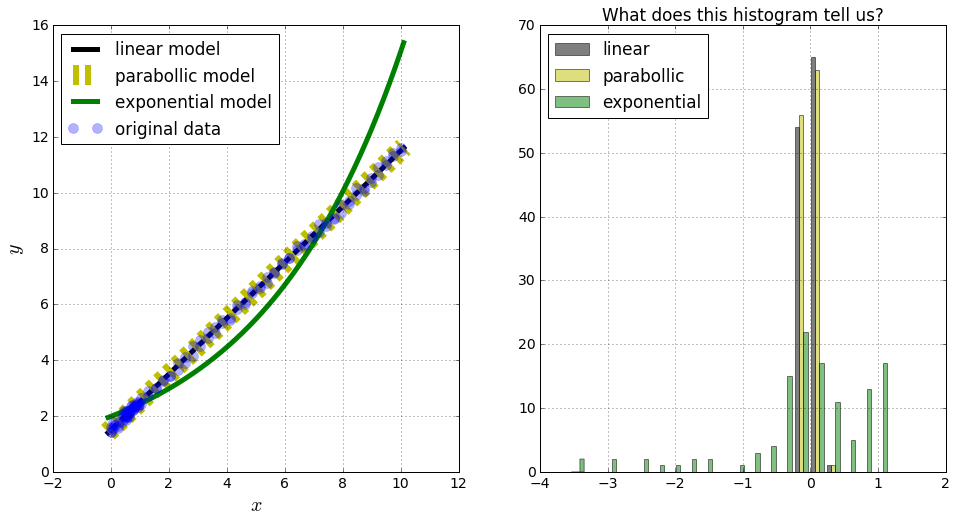

In [11]:
def looking_at_data(type_of_data='diabetes'):
    data=generate_data(type_of_data)
    Ml = create_model(data, type_model='linear')
    Mp = create_model(data, type_model='parabollic')
    Me = create_model(data, type_model='exponential')
    xx=np.linspace(np.min(data[:,0])-0.1,np.max(data[:,0])+0.1,1000)
    yyl=evaluate_model(Ml,xx)
    yyp=evaluate_model(Mp,xx)
    yye=evaluate_model(Me,xx)
    
    error_l=data[:,1]-evaluate_model(Ml,data[:,0])
    error_p=data[:,1]-evaluate_model(Mp,data[:,0])
    error_e=data[:,1]-evaluate_model(Me,data[:,0])
    
    plt.figure(figsize=(2*M,M))
    
    plt.subplot(1, 2, 1)
    plt.plot(xx,yyl,'k-',linewidth=5,label='linear model')
    plt.plot(xx,yyp,'y--',linewidth=20,label='parabollic model')
    plt.plot(xx,yye,'g-',linewidth=5,label='exponential model')
    plt.plot(data[:,0],data[:,1],'.b',markersize=20,label='original data',alpha=0.3)
    plt.grid(True)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    plt.title('What does this histogram tell us?')
    three_errors=np.vstack((error_l, error_p, error_e)).T
    plt.hist(three_errors, bins=20,
             label=['linear','parabollic','exponential'],
             color=['k','y','g'], alpha=0.5)
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.show()
widgets.interact(looking_at_data,type_of_data=['linear','parabollic','exponential','sinusoidal','random','boston house-prices','diabetes'])

## References

### Numpy Least Squares
http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html

### Numpy QR Factorization
http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.qr.html


<div id='acknowledgements' />
# Acknowledgements
* _Material created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`) _and assistans: Laura Bermeo, Alvaro Salinas, Axel Símonsen and Martín Villanueva. DI UTFSM. April 2016._
* _Material updated by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`) DI UTFSM. June 2017.